In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"F:\data sets\complete.csv")

In [3]:
data.head()

,Date,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Latitude,Longitude,Death
0,2020-01-30,Kerala,1.0,0.0,0.0,10.8505,76.2711,0
1,2020-01-31,Kerala,1.0,0.0,0.0,10.8505,76.2711,0
2,2020-02-01,Kerala,2.0,0.0,0.0,10.8505,76.2711,0
3,2020-02-02,Kerala,3.0,0.0,0.0,10.8505,76.2711,0
4,2020-02-03,Kerala,3.0,0.0,0.0,10.8505,76.2711,0


In [4]:
data['Name of State / UT'].value_counts()

Kerala                                  44
Telengana                               12
Delhi                                   12
Rajasthan                               11
Uttar Pradesh                           10
Haryana                                 10
Union Territory of Ladakh                7
Tamil Nadu                               7
Union Territory of Jammu and Kashmir     5
Karnataka                                5
Punjab                                   5
Maharashtra                              5
Andhra Pradesh                           2
Name: Name of State / UT, dtype: int64

In [5]:
import seaborn as sns

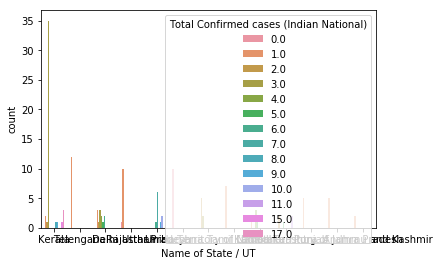

In [6]:
sns.countplot(x='Name of State / UT',hue='Total Confirmed cases (Indian National)',data=data)

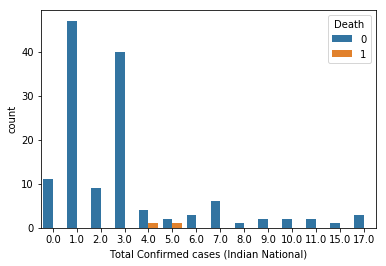

In [7]:
sns.countplot(x='Total Confirmed cases (Indian National)',hue='Death',data=data)

In [8]:
data['Death'].value_counts()

0    133
1      2
Name: Death, dtype: int64

In [9]:
data.columns

Index(['Date', 'Name of State / UT', 'Total Confirmed cases (Indian National)',
       'Total Confirmed cases ( Foreign National )', 'Cured', 'Latitude',
       'Longitude', 'Death'],
      dtype='object')

In [10]:
data.drop(['Name of State / UT',
       'Total Confirmed cases ( Foreign National )', 'Cured', 'Latitude',
       'Longitude', 'Death'],axis=1, inplace=True)

In [11]:
data.head()

,Date,Total Confirmed cases (Indian National)
0,2020-01-30,1.0
1,2020-01-31,1.0
2,2020-02-01,2.0
3,2020-02-02,3.0
4,2020-02-03,3.0


In [12]:
data=data.set_index('Date')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135 entries, 2020-01-30 to 2020-03-12
Data columns (total 1 columns):
Total Confirmed cases (Indian National)    135 non-null float64
dtypes: float64(1)
memory usage: 2.1+ KB


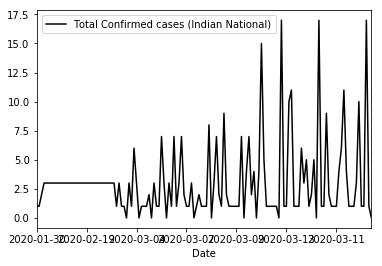

In [14]:
data.plot(style='k')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F9249736A0>]],
      dtype=object)

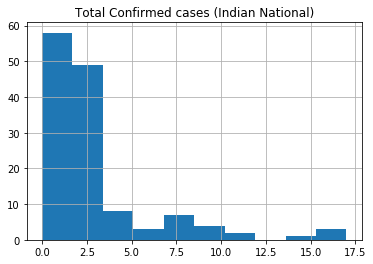

In [15]:
data.hist()

<Figure size 288x72 with 0 Axes>

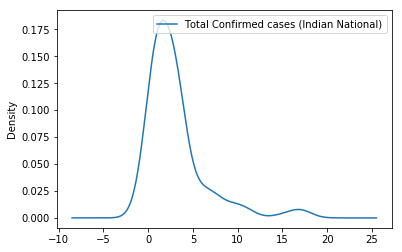

In [16]:
from matplotlib.pyplot import figure
plt.figure(figsize=(4,1))
data.plot(kind='kde')
plt.legend(loc='upper right')
plt.show()

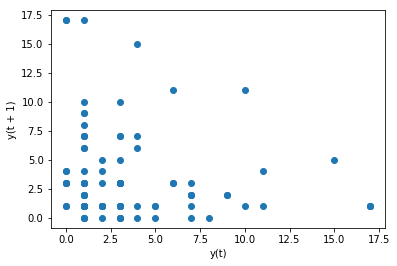

In [17]:
from pandas.plotting import lag_plot
lag_plot(data)

In [18]:
modefieddata=data.diff(periods=1)
modefieddata.dropna(inplace=True)
modefieddata.head()

,Total Confirmed cases (Indian National)
Date,
2020-01-31,0.0
2020-02-01,1.0
2020-02-02,1.0
2020-02-03,0.0
2020-02-04,0.0


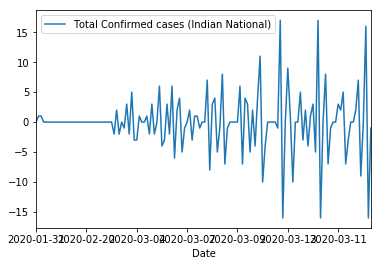

In [19]:
modefieddata.plot()

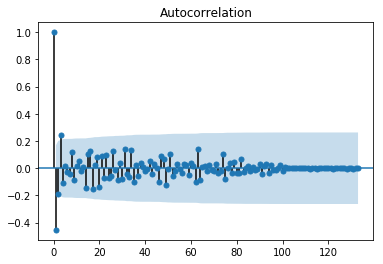

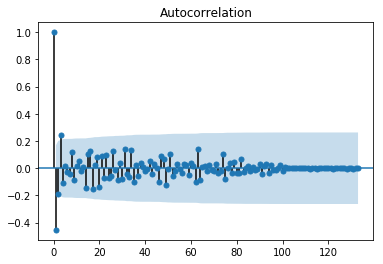

In [20]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(modefieddata)

In [21]:
features=modefieddata

In [22]:
modefieddata.shape

(134, 1)

In [23]:
train=features.iloc[:106].values
test=features.iloc[106:].values

In [24]:
train.shape

(106, 1)

In [25]:
test.shape

(28, 1)

In [30]:
from statsmodels.tsa.arima_model import ARIMA
#p=1
#d=2
#q=1
model=ARIMA(train,order=(2,1,1))
finalmodel=model.fit()

In [31]:
finalmodel.aic

559.0869076141639

In [32]:
predict=finalmodel.forecast(steps=28)

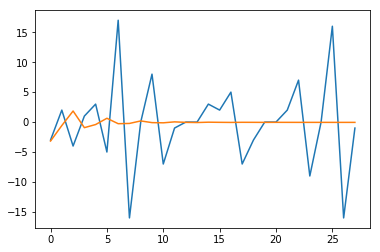

In [33]:
plt.plot(test)
plt.plot(predict[0])